In [59]:
# machine learning
import pandas as pd
from pandas import DataFrame

import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [60]:
# read the housing data
prices = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\\s+')
prices.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
prices.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [61]:
room_feature = ['RM']
selected_features = ['DIS', 'INDUS', 'NOX', 'RM']
all_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


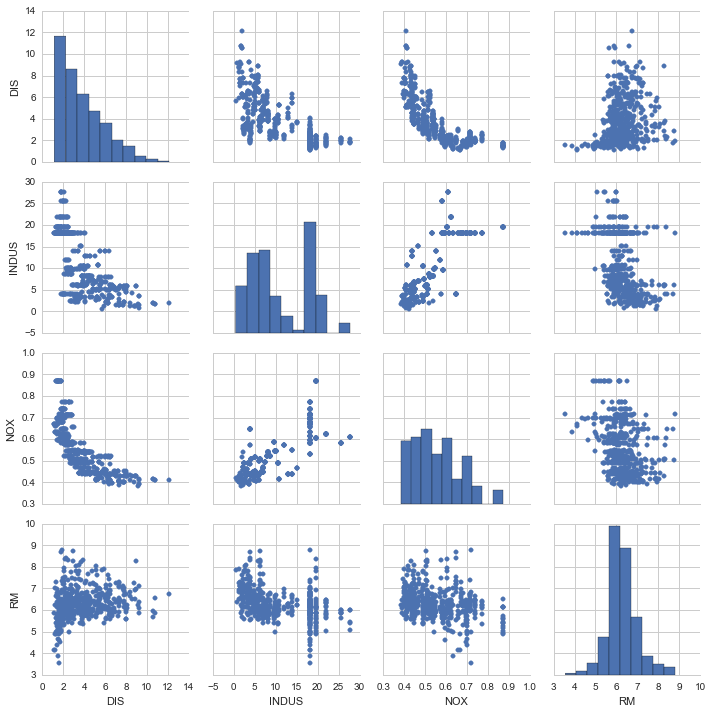

In [62]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(prices[selected_features], size=2.5);

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


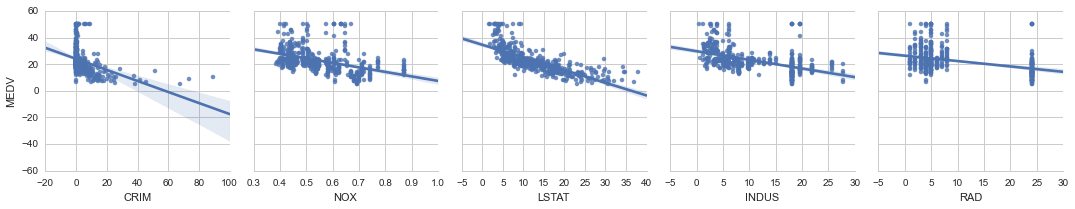

In [63]:
# scatter plot the data and also include a "regression line"
sns.pairplot(prices, x_vars=['CRIM', 'NOX', 'LSTAT', 'INDUS', 'RAD'], y_vars='MEDV', size=3, kind='reg')

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


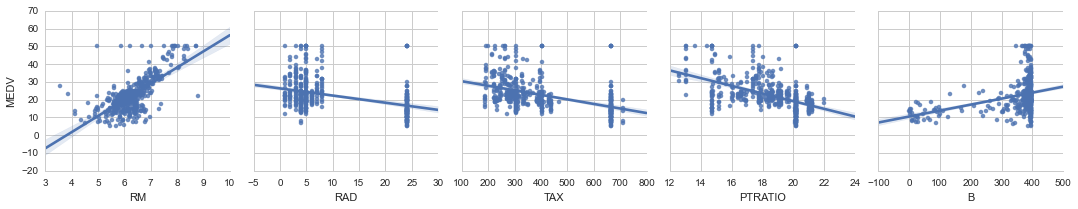

In [64]:
# scatter plot the data and also include a "regression line"
sns.pairplot(prices, x_vars=['RM', 'RAD', 'TAX', 'PTRATIO', 'B'], y_vars='MEDV', size=3, kind='reg')

In [65]:
prices.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [66]:
def draw_heat_map(cm, xlabels, ylabels):
    sns.set(font_scale=1.0)
    hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=ylabels,
    xticklabels=xlabels)

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


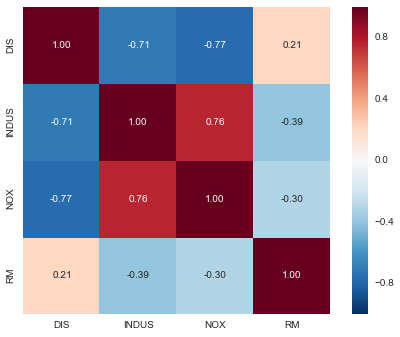

In [67]:
# Dare heat map for a few selected columns
draw_heat_map(prices[selected_features].corr(), selected_features, selected_features)

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


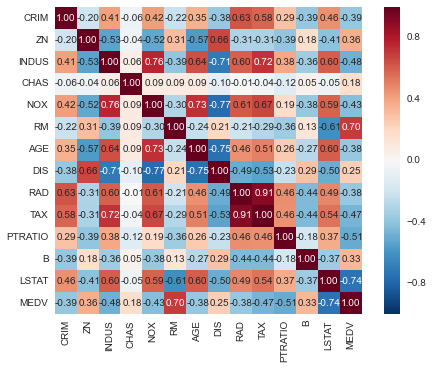

In [68]:
# Dare heat map for all columns
draw_heat_map(prices.corr(), prices.columns, prices.columns)

In [69]:
def fit_predict(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    print('MSE train: %.3f, test: %.3f' % (metrics.mean_squared_error(y_train, y_train_pred), 
                                           metrics.mean_squared_error(y_test, y_test_pred)))

    print('R^2 train: %.3f, test: %.3f' % (metrics.r2_score(y_train, y_train_pred),
                                           metrics.r2_score(y_test, y_test_pred)))
    plt.figure()
    sns.set(style='whitegrid', context='notebook')
    #sns.regplot(y_train_pred, y_train_pred - y_train, scatter=True, fit_reg=False, color='blue', marker='o', label='Training data')
    plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, color='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
    plt.xlim([-10, 50])
    
    return y_train_pred, y_test_pred

In [70]:
def model_coeffs_matrix(features, clf):
    coeffs_matrix = DataFrame(columns=('Feature', 'Co-effcients'))
    coeffs_matrix = coeffs_matrix.append([{'Feature': 'Intercept', 'Co-effcients': clf.intercept_}])

    for feature, coeff in zip(features, clf.coef_):
        coeffs_matrix = coeffs_matrix.append([{'Feature': feature, 'Co-effcients':coeff}]) 
    coeffs_matrix.reset_index(drop=True, inplace=True)
    return coeffs_matrix

MSE train: 42.158, test: 47.033
R^2 train: 0.503, test: 0.435


,Feature,Co-effcients
0,Intercept,-35.994349
1,RM,9.311328


D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


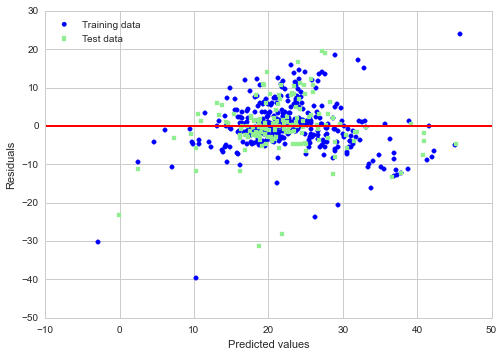

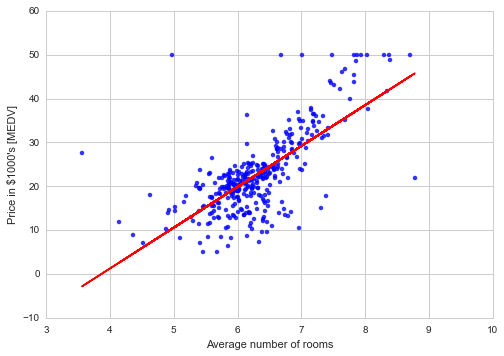

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(prices[room_feature], prices['MEDV'], train_size=0.7, random_state=0)

lin_reg = LinearRegression()
y_train_pred, y_test_pred = fit_predict(lin_reg, X_train, X_test, y_train, y_test)

plt.figure()
sns.set(style='whitegrid', context='notebook')
sns.regplot(X_train, y_train, scatter=True, fit_reg=False, color='blue', marker='o')
plt.plot(X_train, y_train_pred, color='red')
plt.xlabel('Average number of rooms')
plt.ylabel('Price in $1000\'s [MEDV]')

model_coeffs_matrix(room_feature, lin_reg)

MSE train: 34.904, test: 42.047
R^2 train: 0.588, test: 0.495


,Feature,Co-effcients
0,Intercept,-7.543420
1,DIS,-0.964467
2,INDUS,-0.304198
3,NOX,-20.367702
4,RM,7.706240


D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


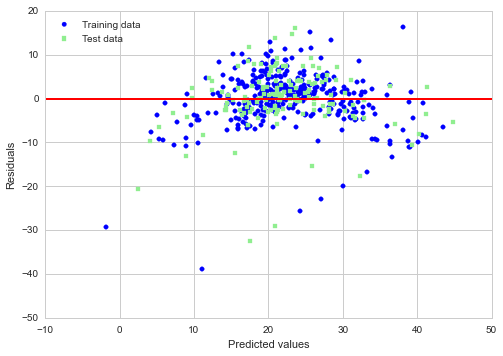

In [72]:
X_train, X_test, y_train, y_test = train_test_split(prices[selected_features], prices['MEDV'], train_size=0.7, random_state=0)

lin_reg = LinearRegression()
y_train_pred, y_test_pred = fit_predict(lin_reg, X_train, X_test, y_train, y_test)

model_coeffs_matrix(selected_features, lin_reg)

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


,Feature,Co-effcients
0,Intercept,37.937108
1,CRIM,-0.121310
2,ZN,0.044466
3,INDUS,0.011342
4,CHAS,2.511246
5,NOX,-16.231253
6,RM,3.859068
7,AGE,-0.009985
8,DIS,-1.500270
9,RAD,0.242143


D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


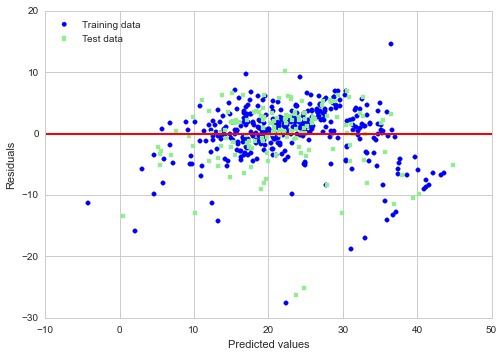

In [73]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(prices[all_features], prices['MEDV'], train_size=0.7, random_state=0)

lin_reg = LinearRegression()
y_train_pred, y_test_pred = fit_predict(lin_reg, X_train, X_test, y_train, y_test)

model_coeffs_matrix(all_features, lin_reg)

MSE train: 34.911, test: 42.044
R^2 train: 0.588, test: 0.495


,Feature,Co-effcients
0,Intercept,-8.287818
1,DIS,-0.930531
2,INDUS,-0.313051
3,NOX,-19.094469
4,RM,7.707311


D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


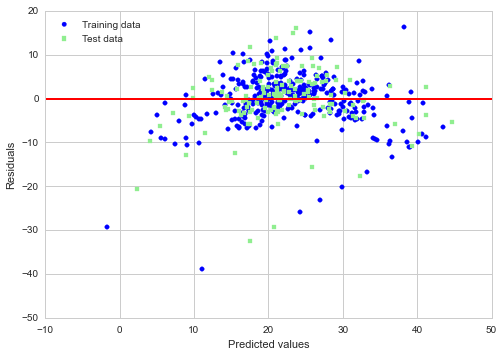

In [74]:
from sklearn.linear_model import RidgeCV

X_train, X_test, y_train, y_test = train_test_split(prices[selected_features], prices['MEDV'], train_size=0.7, random_state=0)

ridge = RidgeCV(alphas=[0.1, 1.0, 10.0])
y_train_pred, y_test_pred = fit_predict(ridge, X_train, X_test, y_train, y_test)

model_coeffs_matrix(selected_features, ridge)

MSE train: 34.911, test: 42.044
R^2 train: 0.588, test: 0.495


,Feature,Co-effcients
0,Intercept,-8.287818
1,DIS,-0.930531
2,INDUS,-0.313051
3,NOX,-19.094469
4,RM,7.707311


D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


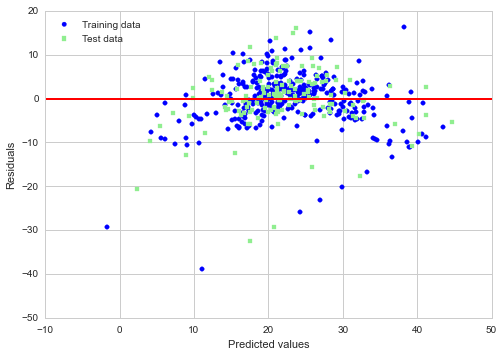

In [75]:
from sklearn.linear_model import LassoCV

X_train, X_test, y_train, y_test = train_test_split(prices[selected_features], prices['MEDV'], train_size=0.7, random_state=0)

lasso = RidgeCV(alphas=[0.1, 1.0, 10.0])
y_train_pred, y_test_pred = fit_predict(lasso, X_train, X_test, y_train, y_test)

model_coeffs_matrix(selected_features, lasso)

MSE train: 34.911, test: 42.044
R^2 train: 0.588, test: 0.495


D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


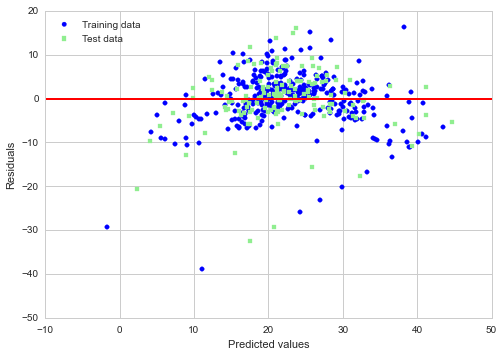

In [76]:
from sklearn.linear_model import ElasticNet

X_train, X_test, y_train, y_test = train_test_split(prices[selected_features], prices['MEDV'], train_size=0.7, random_state=0)

enet = ElasticNet(alpha=1.0, l1_ratio=0.5)
y_train_pred, y_test_pred = fit_predict(lasso, X_train, X_test, y_train, y_test)

In [77]:
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [78]:
# Compute paths
from sklearn.linear_model import Ridge
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
clf = Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

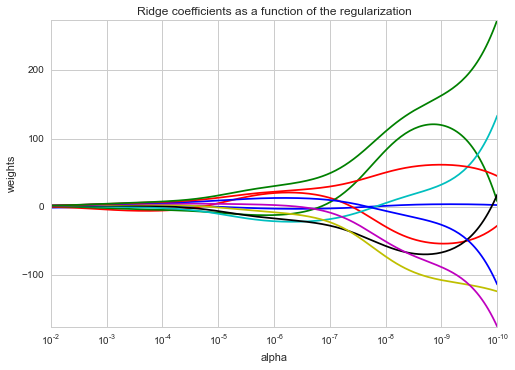

In [79]:
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [82]:
# Compute paths
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(prices[all_features], prices['MEDV'], train_size=0.7, random_state=0)
n_alphas = 2000
alphas = np.logspace(-10, -2, n_alphas)
clf = Ridge(fit_intercept=True)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)

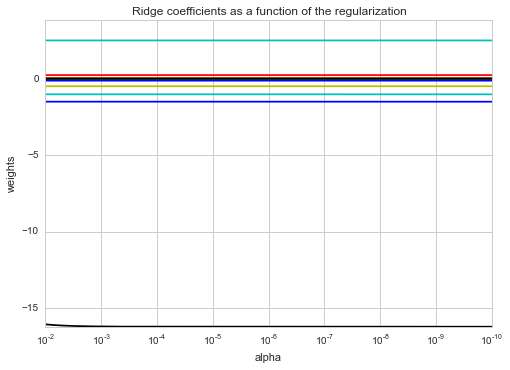

In [83]:
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    print('MSE train: %.3f, test: %.3f' % (metrics.mean_squared_error(y_train, y_train_pred), 
                                           metrics.mean_squared_error(y_test, y_test_pred)))

    print('R^2 train: %.3f, test: %.3f' % (metrics.r2_score(y_train, y_train_pred),
                                           metrics.r2_score(y_test, y_test_pred)))

(0.0, 1.0)

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


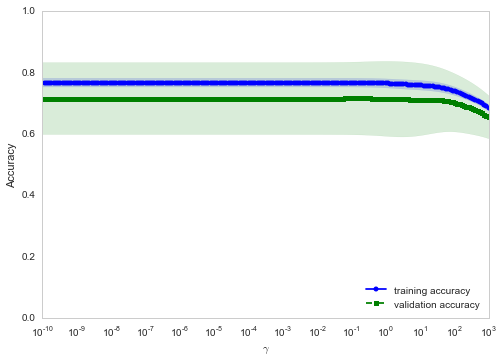

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.learning_curve import validation_curve
X_train, X_test, y_train, y_test = train_test_split(prices[all_features], prices['MEDV'], train_size=0.7, random_state=0)
pipe_ridge = Pipeline([
            ('clf', Ridge(random_state=0))])
n_alphas = 200
alpha_range = np.logspace(-10, 3, n_alphas)
train_scores, test_scores = validation_curve(
                estimator=pipe_ridge, 
                X=X_train, 
                y=y_train, 
                param_name='clf__alpha', 
                param_range=alpha_range,
                cv=10)
#train_scores = 1 - train_scores
#test_scores = 1 - test_scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(alpha_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(alpha_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(alpha_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(alpha_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel("$\gamma$")
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
#plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
#plt.show()

(0.0, 1.0)

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


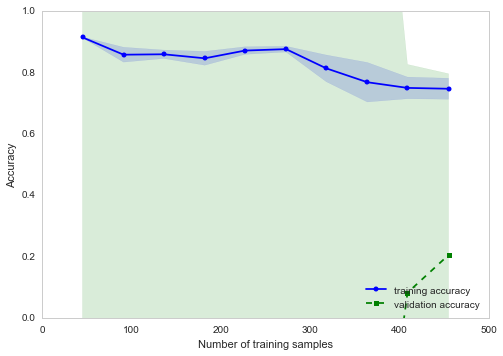

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.learning_curve import learning_curve

from sklearn.linear_model import LinearRegression
#from sklearn.cross_validation import train_test_split
#from sklearn import metrics

#X_train, X_test, y_train, y_test = train_test_split(prices[room_feature], prices['MEDV'], train_size=0.7, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(prices[all_features], prices['MEDV'], train_size=0.7, random_state=0)

#lin_reg = LinearRegression()
#y_train_pred, y_test_pred = fit_predict(lin_reg, X_train, X_test, y_train, y_test)
X_train = prices[all_features]
y_train = prices['MEDV']

pipe_lr = Pipeline([('scl', StandardScaler()),
            ('clf', LinearRegression())])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                train_sizes=np.linspace(0.1, 1.0, 10), 
                cv=10,
                n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.0, 1.0])
#plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
#plt.show()